<a href="https://colab.research.google.com/github/vivekpatel1204/ML-PROJECT/blob/main/ML_FINAL(L).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
data = pd.read_csv('password_data.csv', on_bad_lines='skip')


In [ ]:
data


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


Statistical Analysis

In [ ]:
import statistics

In [ ]:
mean=data['strength'].mean()
print('mean of strength',mean)

mean of strength 0.990196224837226


In [ ]:
median_value = data['strength'].median()
print('median of strength',median_value)

median of strength 1.0


In [ ]:
mode_value = data['strength'].mode()
print('mode of strength',mode_value)

mode of strength 0    1
Name: strength, dtype: int64


In [ ]:
col_range = data['strength'].max() - data['strength'].min()
print('the range is:',col_range)

the range is: 2


In [ ]:
variance = data['strength'].var()
print('the variance is:',variance)

the variance is: 0.2580116125495326


In [ ]:
stan_dev = data['strength'].std()
print('the standard deviation:',stan_dev)

the standard deviation: 0.5079484349316696


Pre-processing

In [ ]:
data['strength'].unique()


array([1, 2, 0])

In [ ]:
data.isna().sum()


password    1
strength    0
dtype: int64

In [ ]:
data.dropna(inplace=True)


In [ ]:
data.isna().sum()


password    0
strength    0
dtype: int64

In [ ]:
password_array = np.array(data)


In [ ]:
password_array


array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [ ]:
import random
random.shuffle(password_array)

In [ ]:
x = [labels[0] for labels in password_array]
y = [labels[1] for labels in password_array]

In [ ]:
def word_divide(inputs):
    c = []
    for i in inputs:
        c.append(i)
    return c

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_divide)
X = vectorizer.fit_transform(x)

In [ ]:
X.shape

(669639, 128)

In [ ]:
vectorizer.get_feature_names_out()

array(['\x05', '\x06', '\x08', '\x0f', '\x10', '\x12', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '\xa0',
       '¡', '¢', '¦', '¨', '«', '°', '±', '²', '³', '´', '¶', '·', '¹',
       'º', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'è', 'é',
       'ê', 'í', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û',
       'ü', 'ý', 'þ', 'ÿ', '‚', '‡', '™'], dtype=object)

In [ ]:
first_document_vector = X[0]
first_document_vector

<1x128 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56730151],
        [0.        ],
        [0.5914277 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
df = pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
þ,0.0
ÿ,0.0
‚,0.0
‡,0.0


In [ ]:
df.sort_values(by=['TF-IDF'],ascending=False)


,TF-IDF
7,0.591428
5,0.567302
z,0.335996
k,0.291508
d,0.285505
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape


(535711, 128)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,multi_class='multinomial')

In [ ]:
classifier.fit(X_train,y_train)


LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
# Predicting results using logistic regression
d = np.array(['%@123abcd'])
pred = vectorizer.transform(d)
classifier.predict(pred)

array([1])

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 5354 12593    10]
 [ 3942 92951  2586]
 [   33  5131 11328]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     17957
           1       0.84      0.93      0.88     99479
           2       0.81      0.69      0.74     16492

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [ ]:
# evaluation metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",acc)

prec = precision_score(y_test, y_pred,average='macro')
print("Precision:", prec)

recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

Accuracy is: 0.8185965593453198
Precision: 0.742441356548624
Recall: 0.6398044347274588
F1 Score: 0.6739685716475453


check password strength using logistic regression



In [ ]:
import getpass
user = 'abc'
data = vectorizer.transform([user]).toarray()
output = classifier.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")


Weak Password


In [ ]:
import getpass
user = 'a1b2@c3d4e5'
data = vectorizer.transform([user]).toarray()
output = classifier.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")

Great Password


In [ ]:
import getpass
user = 'abc456'
data = vectorizer.transform([user]).toarray()
output = classifier.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")

Moderate strength Password


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
d = np.array(['%@123abcd'])
pred = vectorizer.transform(d)
rf.predict(pred)

In [ ]:
y_pred2 = rf.predict(X_test)
y_pred2

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred2)
print(cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

In [ ]:
# evaluation metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acc=accuracy_score(y_test,y_pred2)
print("Accuracy is:",acc)

prec = precision_score(y_test, y_pred2,average='macro')
print("Precision:", prec)

recall = recall_score(y_test, y_pred2, average='macro')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred2, average='macro')
print("F1 Score:", f1)

check password strength

In [ ]:
import getpass
user = 'abc'
data = vectorizer.transform([user]).toarray()
output = rf.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=35)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [ ]:
d = np.array(['%@123abcd'])
pred = vectorizer.transform(d)
dt.predict(pred)

In [ ]:
y_pred3 = dt.predict(X_test)
y_pred3

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred3)
print(cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

In [ ]:
# evaluation metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acc=accuracy_score(y_test,y_pred3)
print("Accuracy is:",acc)

prec = precision_score(y_test, y_pred3,average='macro')
print("Precision:", prec)

recall = recall_score(y_test, y_pred3, average='macro')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred3, average='macro')
print("F1 Score:", f1)

check password strength

In [ ]:
import getpass
user = 'abc'
data = vectorizer.transform([user]).toarray()
output = dt.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kneigh=KNeighborsClassifier()
kneigh.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
d = np.array(['%@123abcd'])
pred = vectorizer.transform(d)
kneigh.predict(pred)

In [ ]:
y_pred4 = kneigh.predict(X_test)
y_pred4

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred4)
print(cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

In [ ]:
# evaluation metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acc=accuracy_score(y_test,y_pred4)
print("Accuracy is:",acc)

prec = precision_score(y_test, y_pred4,average='macro')
print("Precision:", prec)

recall = recall_score(y_test, y_pred4, average='macro')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred4, average='macro')
print("F1 Score:", f1)

check password strength

In [ ]:
import getpass
user = 'abc'
data = vectorizer.transform([user]).toarray()
output = kneigh.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")

graph showing accuracy for the models

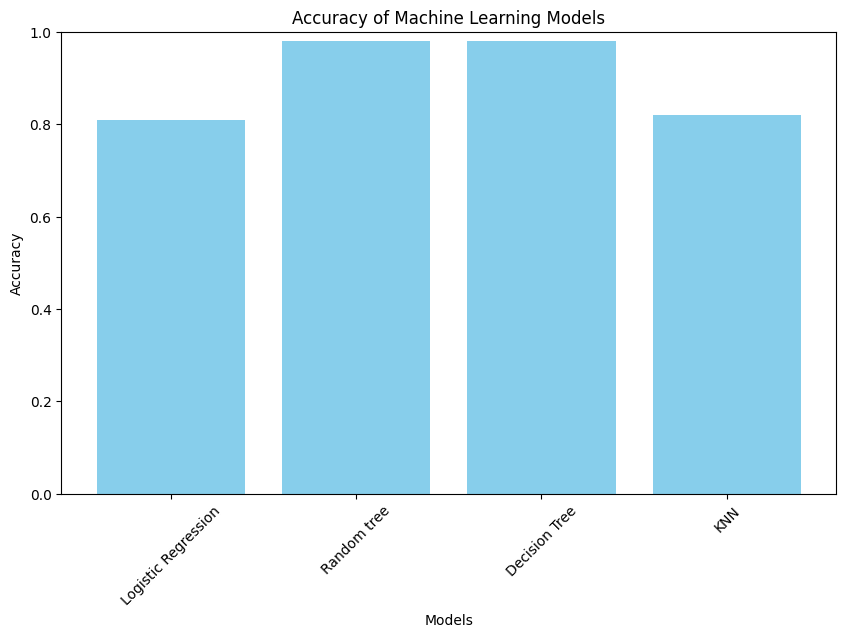

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(accuracy_scores, model_names):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, accuracy_scores, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of Machine Learning Models')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

accuracy_scores = [0.81, 0.98, 0.98, 0.82]
model_names = ['Logistic Regression', 'Random tree', 'Decision Tree', 'KNN']
plot_accuracy(accuracy_scores, model_names)
